# Assignment 1

The questions below relate to the data files associated with the contest with the title "Beijing Multi-Site Air Quality Data" published at the following website. https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data


Problem description:

Your goal is to predict the PM 2.5 levels in the air to determine the Air quality of Beijing. There are multiple datasets concerning different districts in Beijing. The data was recorded hourly for each district.Throughout, missing values have been filled as NaNs.

Dataset Description:
This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.


Assignment:

The goal is achieved through three subsequent Assignments 1 and 2, all using the same dataset

The features in this dataset are provided as following 

No: row number

year: year of data in this row

month: month of data in this row

day: day of data in this row

hour: hour of data in this row

PM2.5: PM2.5 concentration (ug/m^3)

PM10: PM10 concentration (ug/m^3)

SO2: SO2 concentration (ug/m^3)

NO2: NO2 concentration (ug/m^3)

CO: CO concentration (ug/m^3)

O3: O3 concentration (ug/m^3)

TEMP: temperature (degree Celsius)

PRES: pressure (hPa)

DEWP: dew point temperature (degree Celsius)

RAIN: precipitation (mm)

wd: wind direction

WSPM: wind speed (m/s)

station: name of the air-quality monitoring site

(Where appropriate, units are provided as a _unit suffix on the feature name.)


1. This question has 5 parts (a-e). Answer all 5.

a) Load the file 'PRSA_Data_Aotizhongxin_20130301-20170228.csv', display the top 3 rows and observe the data. 

b). Merge all the datasets related to all districts given in the dataset and make a merged dataset.
Rename the following columns correspondlingly as given.

'wd' --> wind_direction

'DEWP' --> dew_point_temp

'TEMP' --> temp

'RAIN' --> rain

'WSPM' --> wind_speed

'PRES' --> pressure

,retaining rest of column name same

c). view top 3 rows and recheck if column name changes have taken effect

d). check the type of columns in dataframe

e). Change the column 'year' and 'month' as categorical variables and check if the column data type is changed and the levels of category are correct. 



In [1]:
#Q1.a
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df.head(3)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
No         35064 non-null int64
year       35064 non-null int64
month      35064 non-null int64
day        35064 non-null int64
hour       35064 non-null int64
PM2.5      34139 non-null float64
PM10       34346 non-null float64
SO2        34129 non-null float64
NO2        34041 non-null float64
CO         33288 non-null float64
O3         33345 non-null float64
TEMP       35044 non-null float64
PRES       35044 non-null float64
DEWP       35044 non-null float64
RAIN       35044 non-null float64
wd         34983 non-null object
WSPM       35050 non-null float64
station    35064 non-null object
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [3]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [4]:
df.shape

(35064, 18)

In [5]:
#Q1.b
import pandas as pd
import glob

path = r'./Assignment1/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

big_frame = pd.concat(li, axis=0, ignore_index=True)
print(big_frame.shape)

(420768, 18)


In [6]:
#Q1.c
big_frame.columns = big_frame.columns.str.replace('wd','wind_direction')
big_frame.columns = big_frame.columns.str.replace('DEWP','dew_point_temp')
big_frame.columns = big_frame.columns.str.replace('TEMP','temp')
big_frame.columns = big_frame.columns.str.replace('RAIN','rain')
big_frame.columns = big_frame.columns.str.replace('WSPM','wind_speed')
big_frame.columns = big_frame.columns.str.replace('PRES','pressure')

big_frame.head(3)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,temp,pressure,dew_point_temp,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


In [7]:
#Q1.d
print (big_frame.dtypes)

No                  int64
year                int64
month               int64
day                 int64
hour                int64
PM2.5             float64
PM10              float64
SO2               float64
NO2               float64
CO                float64
O3                float64
temp              float64
pressure          float64
dew_point_temp    float64
rain              float64
wind_direction     object
wind_speed        float64
station            object
dtype: object


In [8]:
#Q1.e
big_frame.year = big_frame.year.astype('category')
big_frame['year'].dtypes


CategoricalDtype(categories=[2013, 2014, 2015, 2016, 2017], ordered=False)

In [9]:
#Q1.e
big_frame.month = big_frame.month.astype('category')
big_frame['month'].dtypes

#The columns year and month is correctly changed to category and has all levels as required.

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=False)

2. This question has six parts (a-f). Answer any 3 of those six parts.

a). Remove unnecessary columns if any

b). Count NANs(Target variable PM2.5 could contain NANs) in merged dataframe. Explain how to handle them and why did you choose this way to handle them? 

c). Do a point plot of month on x-axis(label them as Jan,feb,march..) and PM2.5 levels on y-axis by month(hint: use group by) and interpret it.

d). Do a box plot to observe the density of target data and interpret the plot.

e). Find the mean, min, max and standard deviation of PM2.5 by station

f). Plot the distribution of the target data and interpret it.

In [10]:
#Q2.b Count NANs(Target variable PM2.5 could contain NANs) in merged dataframe. Explain how to handle them and why did you choose this way to handle them?
#Counting NAN values in merged dataframe
null_columns = big_frame.columns[big_frame.isna().any()]
big_frame[null_columns].isna().sum().sum()


74027

In [11]:
#Using forward fill to remove NAN values. A forward-fill is used to propagate the previous value forward. That way we will have neighbouring values of data instead of NAN.  
big_frame.fillna(method='ffill',inplace=True)

#Displaying to verify the absence of NAN values
print(big_frame[null_columns].isna().sum().sum())

0


Text(0, 0.5, 'PM2.5')

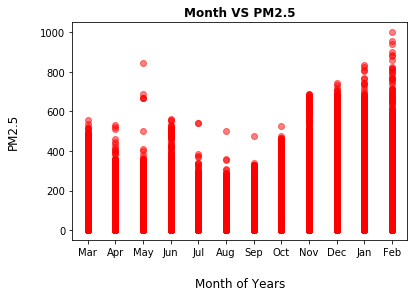

In [12]:
#Q2.c Do a point plot of month on x-axis(label them as Jan,feb,march..) and PM2.5 levels on y-axis by month(hint: use group by) and interpret it.

import calendar
big_frame['month'] = big_frame['month'].apply(lambda x: calendar.month_abbr[x])

plt.scatter(big_frame['month'],big_frame['PM2.5'],color='red',alpha=.5,)
plt.title('Month VS PM2.5', weight='bold')
plt.xlabel('Month of Years',labelpad=20, size=12)
plt.ylabel('PM2.5',labelpad=20, size=12)

#The point plot Feb month has highest PM2.5 value. September month has lowest high possible PM2.5 value. 

In [13]:
#Q2.e Find the mean, min, max and standard deviation of PM2.5 by station

station=big_frame['station'].unique()   
big_frame.groupby('station')['PM2.5'].agg([pd.np.mean, pd.np.min, pd.np.max, pd.np.std])


,mean,amin,amax,std
station,,,,
Aotizhongxin,83.163652,3.0,898.0,82.290700
Changping,71.119444,2.0,882.0,72.424333
Dingling,67.429857,3.0,881.0,74.819357
Dongsi,86.310293,3.0,737.0,86.337389
Guanyuan,83.047023,2.0,680.0,81.307042
Gucheng,84.345203,2.0,770.0,83.228885
Huairou,69.949581,2.0,762.0,71.196244
Nongzhanguan,85.289471,2.0,844.0,86.984595
Shunyi,80.021067,2.0,941.0,82.094866


In [2]:
#Merge datasets

3. This question has four parts (a-d). Answer any 2 of these 4 parts.

a). Check the correlations between the independent variables and mention the strongest one.


b). Find and remove the outliers to bring the mean and standard deviation closer to each other.


c). Find out the highest hour pollution level(PM2.5)(specify what hour or hours has high PM2.5 levels) in years 2013 and 2017 and generate a plot to show it.

d). Reindex the columns such that target variable(PM2.5) should be at the last in the column index.


Extra point(0.1) if all the plots have the following decorators:

Including all the required libraries at one place

Plot title

X-label, Y-label

X-ticks and y-ticks have proper sequence matching dataset, non overlapping text

Colored plots

Legend, if there is grouping in plot

# Submit the following for this assignment:

.ipynb and .html formats of Jupyter notebook code with outputs

In [14]:
#Q3.a Check the correlations between the independent variables and mention the strongest one.
r = big_frame.corr()
r
# As we can see from table below strongest positivitive correlation is between PM10 and PM2.5 equal to '0.876213'. Strongest negative correlation '-0.813310' between pressure and temp 

,No,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,temp,pressure,dew_point_temp,rain,wind_speed
No,1.000000,1.776442e-02,6.838683e-04,-0.025048,-0.047731,-0.222922,-0.043354,0.016736,-0.040876,-0.122635,0.188631,-0.102118,0.004811,0.054138
day,0.017764,1.000000e+00,-5.117392e-18,0.004421,0.027072,-0.001538,0.012969,-0.017888,-0.001726,0.014233,0.021986,0.022995,-0.003708,-0.011539
hour,0.000684,-5.117392e-18,1.000000e+00,0.010579,0.048607,0.028371,-0.001976,-0.032315,0.271127,0.142178,-0.038460,-0.011952,0.012369,0.140406
PM2.5,-0.025048,4.420899e-03,1.057881e-02,1.000000,0.876213,0.469207,0.654277,0.773015,-0.144707,-0.130454,0.019145,0.112820,-0.014153,-0.269565
PM10,-0.047731,2.707231e-02,4.860671e-02,0.876213,1.000000,0.453617,0.639971,0.686354,-0.107736,-0.096779,-0.017285,0.066883,-0.026234,-0.177755
SO2,-0.222922,-1.538095e-03,2.837146e-02,0.469207,0.453617,1.000000,0.476857,0.514696,-0.162745,-0.316100,0.218482,-0.262355,-0.039387,-0.107568
NO2,-0.043354,1.296902e-02,-1.975806e-03,0.654277,0.639971,0.476857,1.000000,0.682958,-0.454530,-0.269755,0.170195,-0.028799,-0.043276,-0.392141
CO,0.016736,-1.788789e-02,-3.231537e-02,0.773015,0.686354,0.514696,0.682958,1.000000,-0.302272,-0.328008,0.192233,-0.066732,-0.013269,-0.286503
O3,-0.040876,-1.726012e-03,2.711268e-01,-0.144707,-0.107736,-0.162745,-0.454530,-0.302272,1.000000,0.582970,-0.442192,0.310183,0.023140,0.287950
temp,-0.122635,1.423324e-02,1.421779e-01,-0.130454,-0.096779,-0.316100,-0.269755,-0.328008,0.582970,1.000000,-0.813310,0.820279,0.037629,0.032725


In [15]:
#Q3.d Reindex the columns such that target variable(PM2.5) should be at the last in the column index.
column=['year','month','day','hour','PM10','SO2','NO2','CO','O3','temp','pressure','dew_point_temp','rain wind_direction','wind_speed','station','PM2.5']
print(big_frame.reindex(column, axis='columns'))

        year month  day  hour   PM10   SO2    NO2      CO    O3  temp  \
0       2013   Mar    1     0    4.0   4.0    7.0   300.0  77.0  -0.7   
1       2013   Mar    1     1    8.0   4.0    7.0   300.0  77.0  -1.1   
2       2013   Mar    1     2    7.0   5.0   10.0   300.0  73.0  -1.1   
3       2013   Mar    1     3    6.0  11.0   11.0   300.0  72.0  -1.4   
4       2013   Mar    1     4    3.0  12.0   12.0   300.0  72.0  -2.0   
5       2013   Mar    1     5    5.0  18.0   18.0   400.0  66.0  -2.2   
6       2013   Mar    1     6    3.0  18.0   32.0   500.0  50.0  -2.6   
7       2013   Mar    1     7    6.0  19.0   41.0   500.0  43.0  -1.6   
8       2013   Mar    1     8    6.0  16.0   43.0   500.0  45.0   0.1   
9       2013   Mar    1     9    8.0  12.0   28.0   400.0  59.0   1.2   
10      2013   Mar    1    10    6.0   9.0   12.0   400.0  72.0   1.9   
11      2013   Mar    1    11    6.0   9.0   14.0   400.0  71.0   2.9   
12      2013   Mar    1    12    6.0   7.0   13.0  